# Loan-Tap  Case_Study

---

In [1]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [2]:
warnings.filterwarnings('ignore')

In [ ]:
# read csv file
df = pd.read_csv('Loan_Tap_Approval.csv')

In [4]:
# overview of dataframe
df.sample(3)

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
25293,18000.0,60 months,14.99,428.13,C,C5,cna,9 years,MORTGAGE,40000.0,...,20.0,1.0,17106.0,64.8,31.0,w,INDIVIDUAL,1.0,1.0,21495 Stacey Burgs Suite 107\r\nSouth Jeanette...
176604,4000.0,36 months,17.56,143.73,D,D1,Daltile,10+ years,RENT,80000.0,...,10.0,0.0,14841.0,89.4,22.0,f,INDIVIDUAL,3.0,0.0,"26909 Jeffrey Junctions\r\nPort Jackstad, MS 4..."
155849,3625.0,36 months,16.20,127.81,C,C4,NaN,NaN,OWN,18152.0,...,8.0,0.0,5560.0,52.0,14.0,f,INDIVIDUAL,1.0,0.0,"46791 Kelsey Drive\r\nPort Kyle, CT 22690"


#### Purpose and Title column both have same values that's why drop title column
#### Grade and Sub_grade is kind of same column drop this as well

In [5]:
# droping unnecessary columns
df.drop(['sub_grade','title'], axis=1, inplace=True)

---

## 1. Exploratory Data Analysis

### a. Observations on shape of data and data types of all attributes

In [6]:
# checking the shape of the datafeame
print(f'Number of rows : {df.shape[0]}')
print(f'Number of columns : {df.shape[1]}')

Number of rows : 396030
Number of columns : 25


In [7]:
# checking data types of all attributes
print('Column Name           Type of Data')
print('-'*45)
df.dtypes

Column Name           Type of Data
---------------------------------------------


loan_amnt               float64
term                     object
int_rate                float64
installment             float64
grade                    object
emp_title                object
emp_length               object
home_ownership           object
annual_inc              float64
verification_status      object
issue_d                  object
loan_status              object
purpose                  object
dti                     float64
earliest_cr_line         object
open_acc                float64
pub_rec                 float64
revol_bal               float64
revol_util              float64
total_acc               float64
initial_list_status      object
application_type         object
mort_acc                float64
pub_rec_bankruptcies    float64
address                  object
dtype: object

In [8]:
# summery of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 25 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   emp_title             373103 non-null  object 
 6   emp_length            377729 non-null  object 
 7   home_ownership        396030 non-null  object 
 8   annual_inc            396030 non-null  float64
 9   verification_status   396030 non-null  object 
 10  issue_d               396030 non-null  object 
 11  loan_status           396030 non-null  object 
 12  purpose               396030 non-null  object 
 13  dti                   396030 non-null  float64
 14  earliest_cr_line      396030 non-null  object 
 15  

396030 rows and 27 columns are there and taking 81.6+ MB memory. There are 15 object and 12 float columns.

### b. Check for missing value

In [9]:
# missing values check
df.isna().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
emp_title               22927
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
dtype: int64

There are some columns which is having null values

### c. Display the statistical summary

In [10]:
# mathematical overview of dataframe
df.describe()

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
count,396030.000000,396030.000000,396030.000000,3.960300e+05,396030.000000,396030.000000,396030.000000,3.960300e+05,395754.000000,396030.000000,358235.000000,395495.000000
mean,14113.888089,13.639400,431.849698,7.420318e+04,17.379514,11.311153,0.178191,1.584454e+04,53.791749,25.414744,1.813991,0.121648
std,8357.441341,4.472157,250.727790,6.163762e+04,18.019092,5.137649,0.530671,2.059184e+04,24.452193,11.886991,2.147930,0.356174
min,500.000000,5.320000,16.080000,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000,2.000000,0.000000,0.000000
25%,8000.000000,10.490000,250.330000,4.500000e+04,11.280000,8.000000,0.000000,6.025000e+03,35.800000,17.000000,0.000000,0.000000
50%,12000.000000,13.330000,375.430000,6.400000e+04,16.910000,10.000000,0.000000,1.118100e+04,54.800000,24.000000,1.000000,0.000000
75%,20000.000000,16.490000,567.300000,9.000000e+04,22.980000,14.000000,0.000000,1.962000e+04,72.900000,32.000000,3.000000,0.000000
max,40000.000000,30.990000,1533.810000,8.706582e+06,9999.000000,90.000000,86.000000,1.743266e+06,892.300000,151.000000,34.000000,8.000000


Statistc summery shows the min, max, count, standard daviation and 25, 50 and 75 percentile of the numerical columns

### d. Univariate Analysis and Bivariate Analysis of all the attributes

#### Correlation 

In [11]:
df_numerical = df.drop(df.select_dtypes(include='object'), axis=1)

In [1]:
# visualization of correlation
plt.figure(figsize=(8,5))
sns.heatmap(df_numerical.corr(), cmap= "Greens", annot=True)
plt.title('Correlation of Numerical columns')
plt.show()

NameError: name 'plt' is not defined

#### Univariate Analysis

In [13]:
# checking for loan_status
loan_status = df['loan_status'].value_counts().reset_index()
loan_status

,loan_status,count
0,Fully Paid,318357
1,Charged Off,77673


More than half people are fully paid 

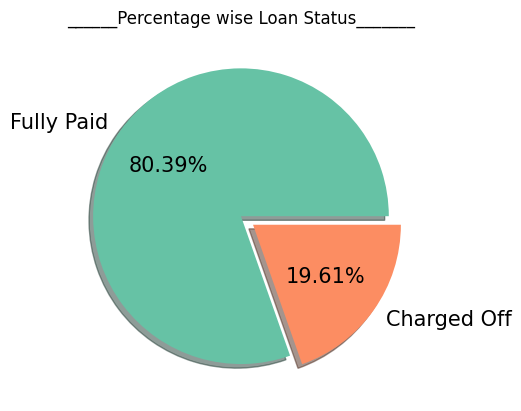

In [14]:
# visualization of loan_status with pie chart
plt.pie(loan_status['count'], labels=loan_status['loan_status'],
        autopct='%2.2f%%', colors=sns.color_palette('Set2'),
        explode=[0,0.1], shadow=True, textprops={'fontsize':15})
plt.title('______Percentage wise Loan Status_______')
plt.show()

In [15]:
# checking value_counts of term
term = df['term'].value_counts()
term

term
36 months    302005
60 months     94025
Name: count, dtype: int64

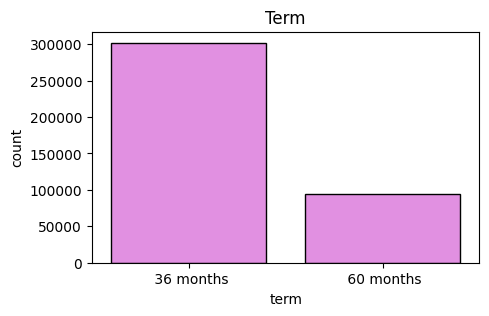

In [16]:
# visualization of term 
plt.figure(figsize=(5,3))
sns.countplot(x=df['term'], color='violet', edgecolor='black')
plt.title('Term')
plt.show()

In [17]:
emp_len = df['emp_length'].value_counts().reset_index()
emp_len

,emp_length,count
0,10+ years,126041
1,2 years,35827
2,< 1 year,31725
3,3 years,31665
4,5 years,26495
5,1 year,25882
6,4 years,23952
7,6 years,20841
8,7 years,20819
9,8 years,19168


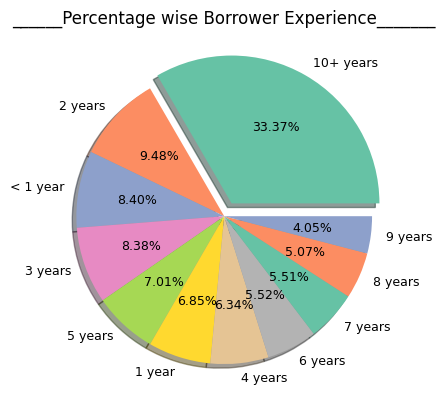

In [18]:
plt.pie(emp_len['count'], labels=emp_len['emp_length'],
        autopct='%2.2f%%', colors=sns.color_palette('Set2'),
        explode = [0.1,0,0,0,0,0,0,0,0,0,0],
        shadow=True, textprops={'fontsize':9})
plt.title('______Percentage wise Borrower Experience_______')
plt.show()

One-Third part of people have 10+ years experience

In [19]:
# checking value_counts of verificatin_status
verification = df['verification_status'].value_counts()
verification

verification_status
Verified           139563
Source Verified    131385
Not Verified       125082
Name: count, dtype: int64

verificatin_status almost have same distribution

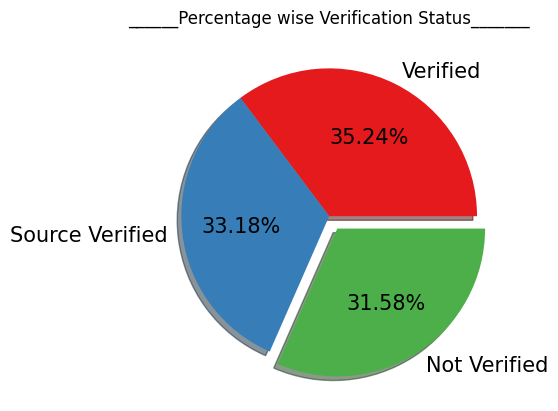

In [20]:
# visualization of verification_status via pie chart
plt.pie(verification.values, labels=verification.index,
        autopct='%2.2f%%', colors=sns.color_palette('Set1'),
        explode=[0,0,0.1], shadow=True, textprops={'fontsize':15})
plt.title('______Percentage wise Verification Status_______')
plt.show()

In [21]:
# checking for loan purpose
purpose = df['purpose'].value_counts().reset_index()
purpose

,purpose,count
0,debt_consolidation,234507
1,credit_card,83019
2,home_improvement,24030
3,other,21185
4,major_purchase,8790
5,small_business,5701
6,car,4697
7,medical,4196
8,moving,2854
9,vacation,2452


More than half people have the same purpose to take the loan<br>
And only 257 people want to take loan for educationl purpose

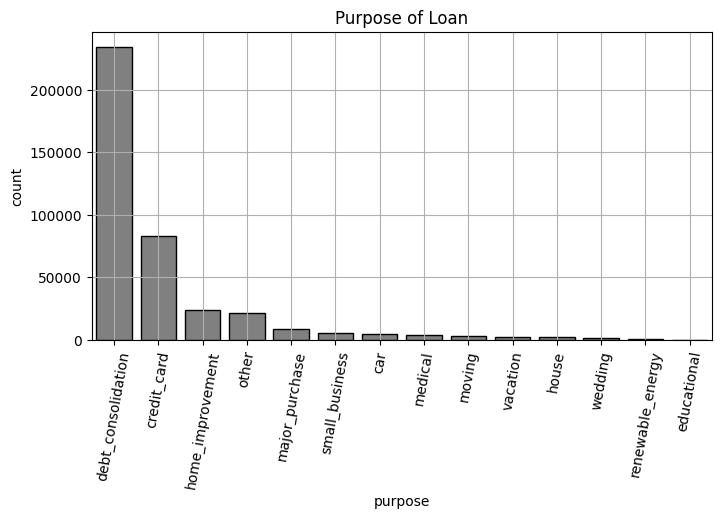

In [22]:
# visualization of loan purpose
plt.figure(figsize=(8,4))
sns.barplot(x=purpose['purpose'], y=purpose['count'], color='grey', edgecolor='black')
plt.xticks(rotation=80)
plt.title('Purpose of Loan')
plt.grid()
plt.show()

In [23]:
# checking value_counts of home_ownership
home_ownership = df['home_ownership'].value_counts()
home_ownership 

home_ownership
MORTGAGE    198348
RENT        159790
OWN          37746
OTHER          112
NONE            31
ANY              3
Name: count, dtype: int64

Here, NONE and ANY have low count

In [24]:
# converting NONE and ANY into OTHER
df['home_ownership'] = df['home_ownership'].apply(lambda x:'OTHER' if x=='NONE' or x=='ANY' else x)

In [25]:
home_ownership = df['home_ownership'].value_counts()
home_ownership 

home_ownership
MORTGAGE    198348
RENT        159790
OWN          37746
OTHER          146
Name: count, dtype: int64

Half people have MORTGAGE<br>
And less than second half have RENTAL house

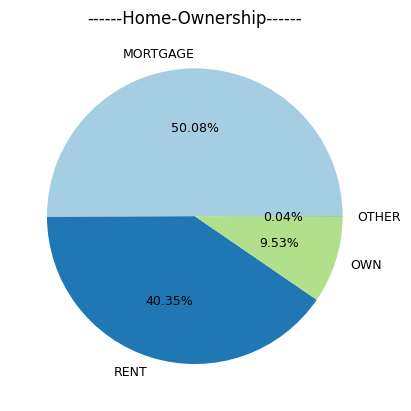

In [26]:
# visualization of home_ownership with pie chart
plt.pie(home_ownership.values, labels=home_ownership.index, 
        autopct='%2.2f%%', textprops={'fontsize':9}, 
        colors = sns.color_palette('Paired'))
plt.title('------Home-Ownership------')
plt.show()

Only 9.5% people have their own house

#### Bivariate Analysis

In [27]:
# checking for grade 
grade = df['grade'].value_counts()
grade

grade
B    116018
C    105987
A     64187
D     63524
E     31488
F     11772
G      3054
Name: count, dtype: int64

One-Third part of the people got B grade

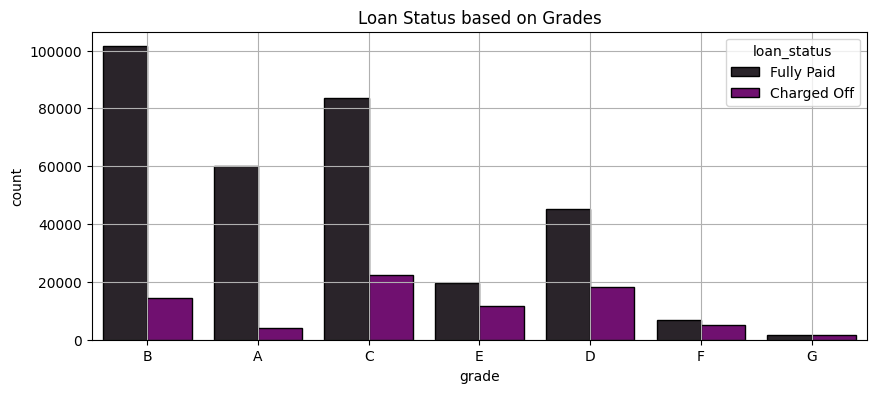

In [28]:
# visaulization of grade with loan_status parameter
plt.figure(figsize=(10,4))
sns.countplot(x=df['grade'], hue=df['loan_status'], color='purple', edgecolor='black')
plt.title('Loan Status based on Grades')
plt.grid()
plt.show()

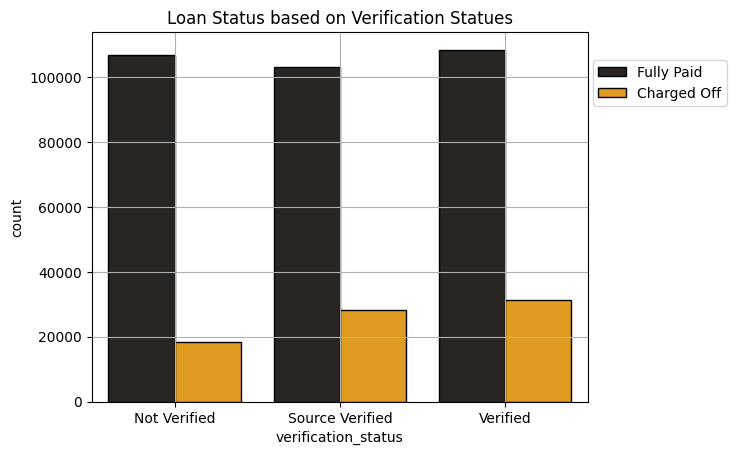

In [29]:
# visualization of verification_status with loan_status
sns.countplot(x=df['verification_status'], hue=df['loan_status'], color='orange', edgecolor='black')
plt.title('Loan Status based on Verification Statues')
plt.legend(loc=(1.01,0.8))
plt.grid()
plt.show()

In [30]:
# cheching for applycation_type
df['application_type'].value_counts().reset_index()

,application_type,count
0,INDIVIDUAL,395319
1,JOINT,425
2,DIRECT_PAY,286


395319 are the loan which has taken INDIVIDUAL

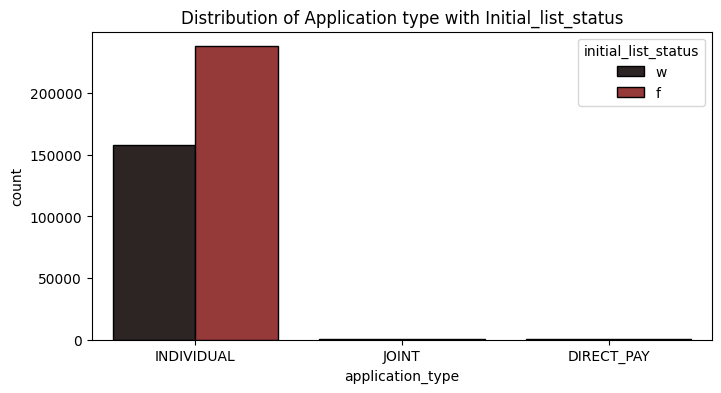

In [31]:
# visualuzation of application_type with initial_list_status
plt.figure(figsize=(8,4))
sns.countplot(x=df['application_type'], hue=df['initial_list_status'], color='brown', edgecolor='black')
plt.title('Distribution of Application type with Initial_list_status')
plt.show()

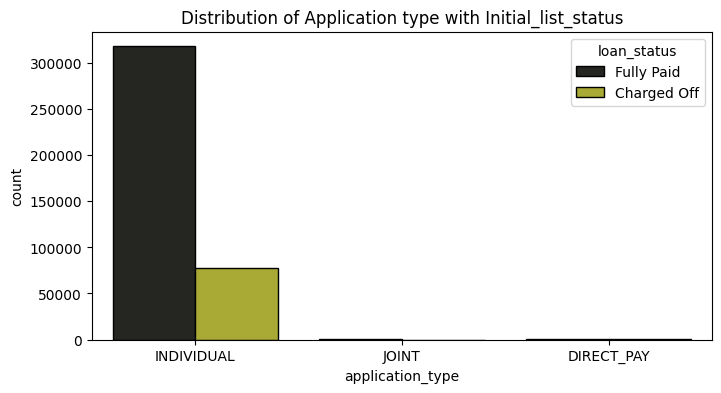

In [32]:
# visualization of application_status with loan_status
plt.figure(figsize=(8,4))
sns.countplot(x=df['application_type'], hue=df['loan_status'], color='C8', edgecolor='black')
plt.title('Distribution of Application type with Initial_list_status')
plt.show()

Almost 80% of the INDIVIDUAL people are fully paid

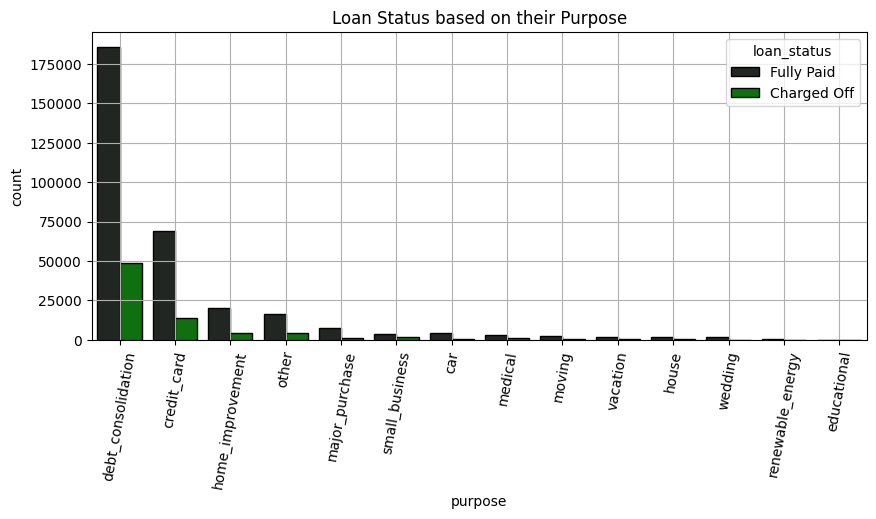

In [33]:
# visualization of loan purpose with loan_status
plt.figure(figsize=(10,4))
sns.countplot(x=df['purpose'],hue=df['loan_status'],order=df['purpose'].value_counts().index, color='green', edgecolor='black')
plt.xticks(rotation=80)
plt.title('Loan Status based on their Purpose')
plt.grid()
plt.show()

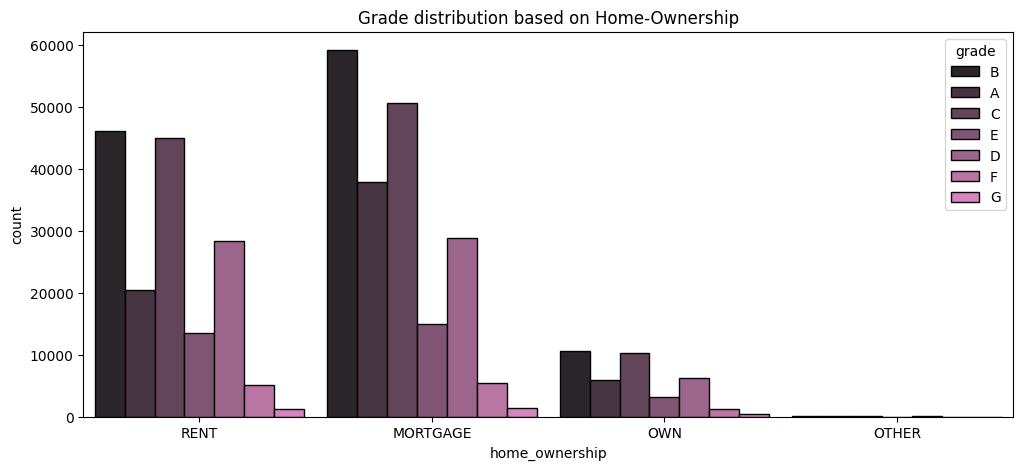

In [34]:
# visualization of grade with home_ownership
plt.figure(figsize=(12,5))
sns.countplot(x=df['home_ownership'], hue=df['grade'], width=0.9, color='C6', edgecolor='black')
plt.title('Grade distribution based on Home-Ownership')
plt.show()

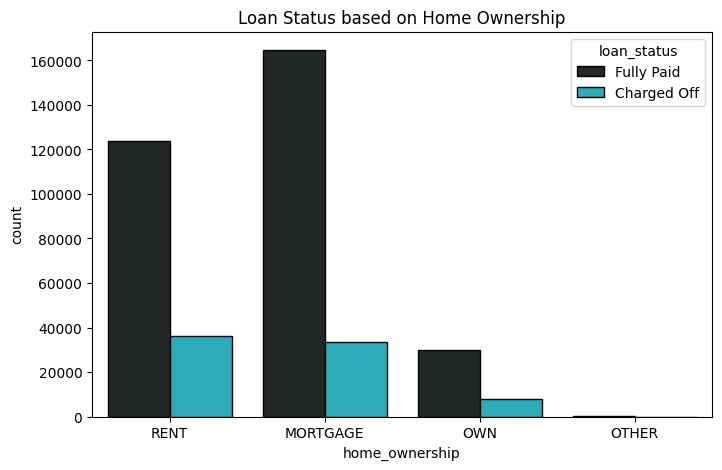

In [35]:
# visualization of home_ownership with loan_status
plt.figure(figsize=(8,5))
sns.countplot(x=df['home_ownership'], hue=df['loan_status'], color='C9', edgecolor='black')
plt.title('Loan Status based on Home Ownership')
plt.show()

---

### a. Ranges of numerical attributes

In [36]:
print(f'Min, Max and Range of all Numerical attributes')
print('-'*50)

# finding the range 
for colom in df_numerical:
    # min and max value of column
    min_ = df[colom].min()
    max_ = df[colom].max()

    # range of attribute
    range_ = max_ - min_ 

    # display range
    print(f'{colom} Min -> {min_}, Max -> {max_} and Range -> {range_}\n')

Min, Max and Range of all Numerical attributes
--------------------------------------------------
loan_amnt Min -> 500.0, Max -> 40000.0 and Range -> 39500.0

int_rate Min -> 5.32, Max -> 30.99 and Range -> 25.669999999999998

installment Min -> 16.08, Max -> 1533.81 and Range -> 1517.73

annual_inc Min -> 0.0, Max -> 8706582.0 and Range -> 8706582.0

dti Min -> 0.0, Max -> 9999.0 and Range -> 9999.0

open_acc Min -> 0.0, Max -> 90.0 and Range -> 90.0

pub_rec Min -> 0.0, Max -> 86.0 and Range -> 86.0

revol_bal Min -> 0.0, Max -> 1743266.0 and Range -> 1743266.0

revol_util Min -> 0.0, Max -> 892.3 and Range -> 892.3

total_acc Min -> 2.0, Max -> 151.0 and Range -> 149.0

mort_acc Min -> 0.0, Max -> 34.0 and Range -> 34.0

pub_rec_bankruptcies Min -> 0.0, Max -> 8.0 and Range -> 8.0



### b. Outliers of various attributes

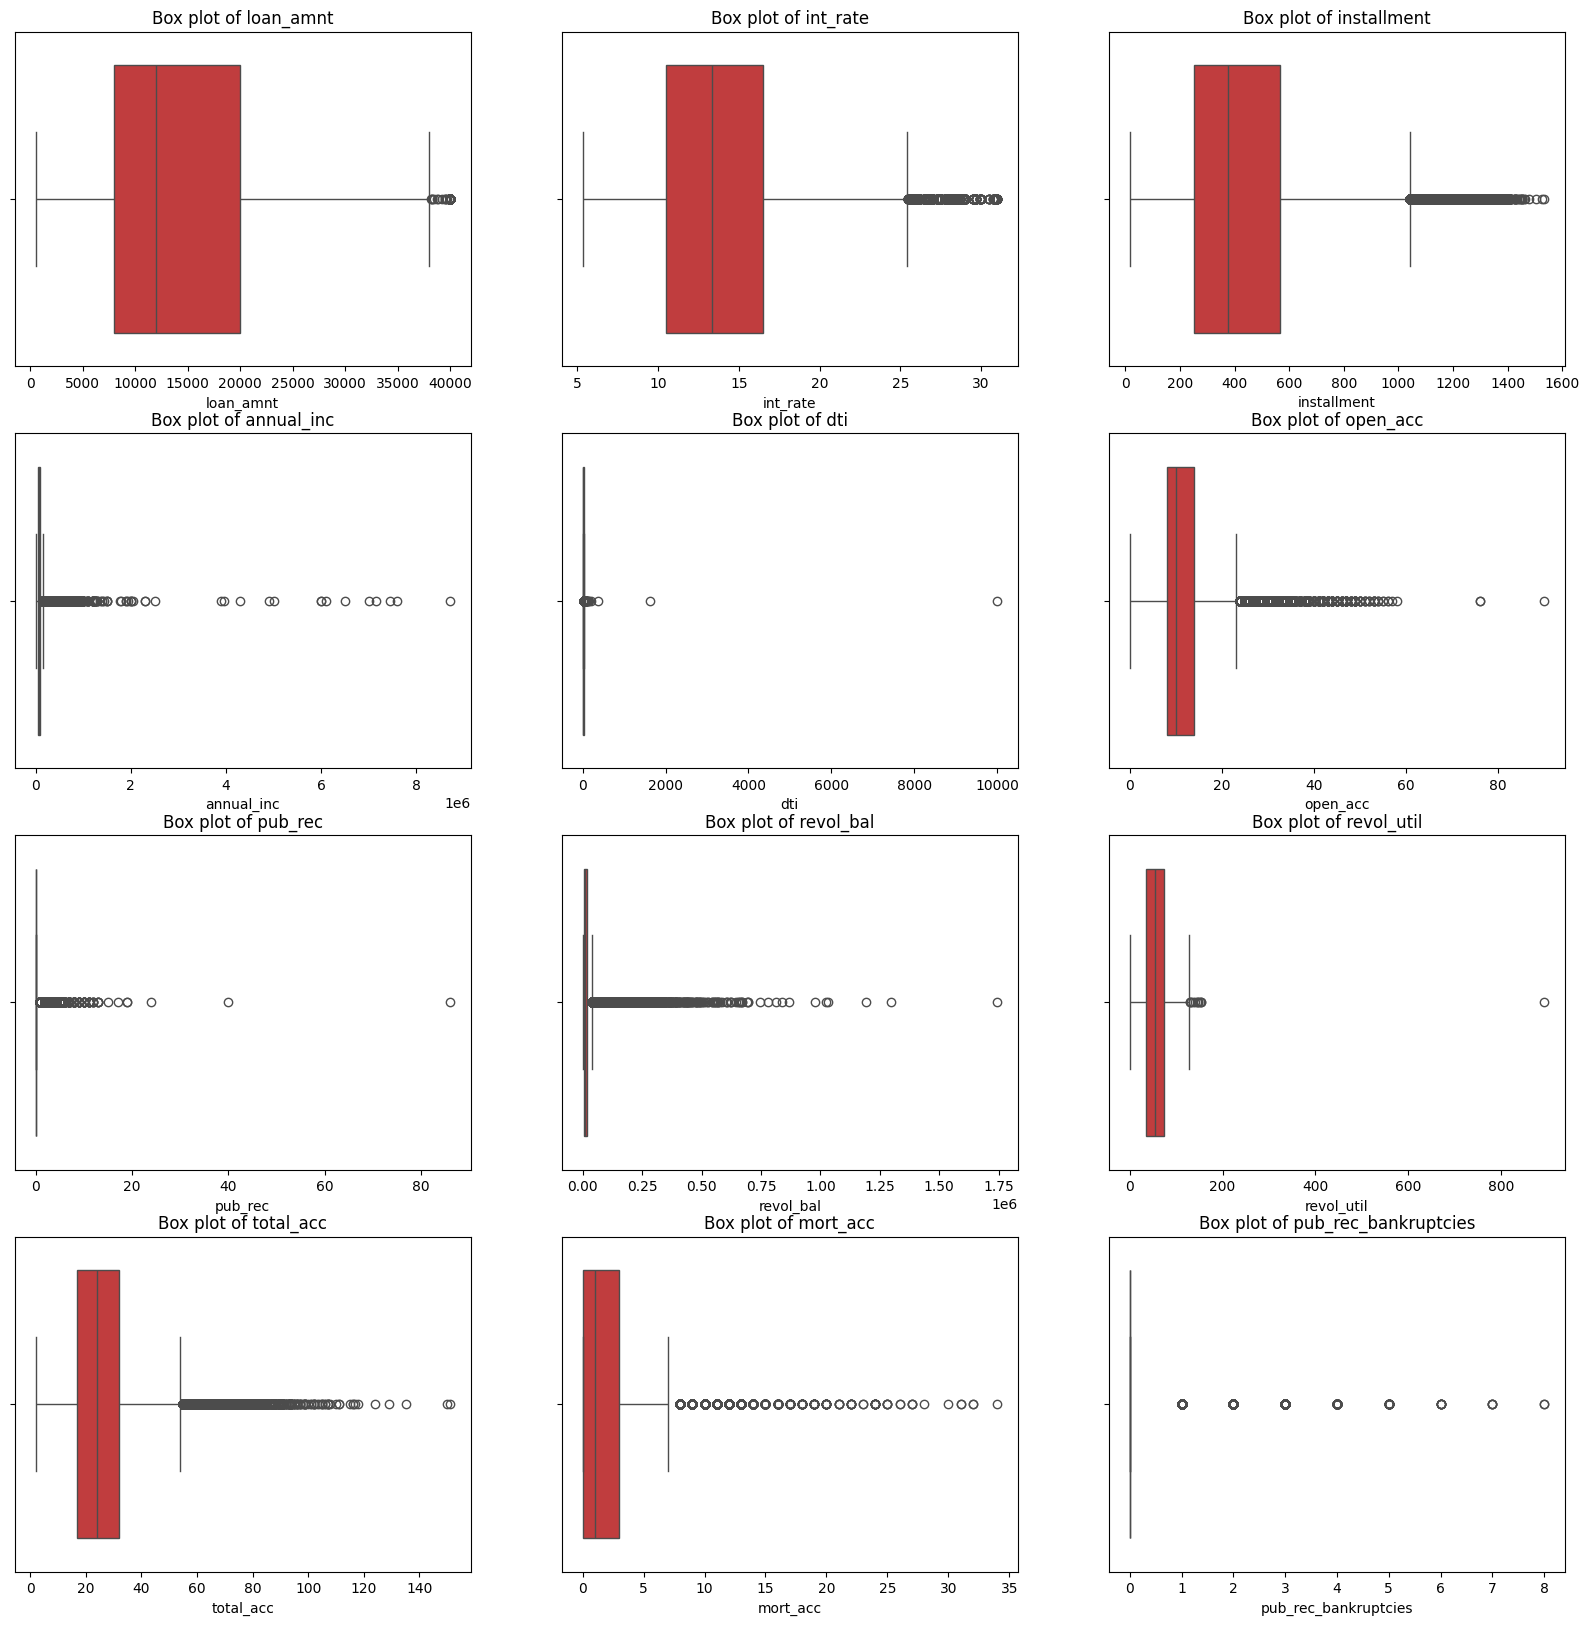

In [37]:
# visualization of outliers
i = 1
plt.figure(figsize=(20,20))
for num_col in df_numerical:
    plt.subplot(4,3,i)
    sns.boxplot(x = df[num_col], color='C3')
    plt.title(f'Box plot of {num_col}')
    i += 1
plt.show()

### c. Distribution of the attritutes

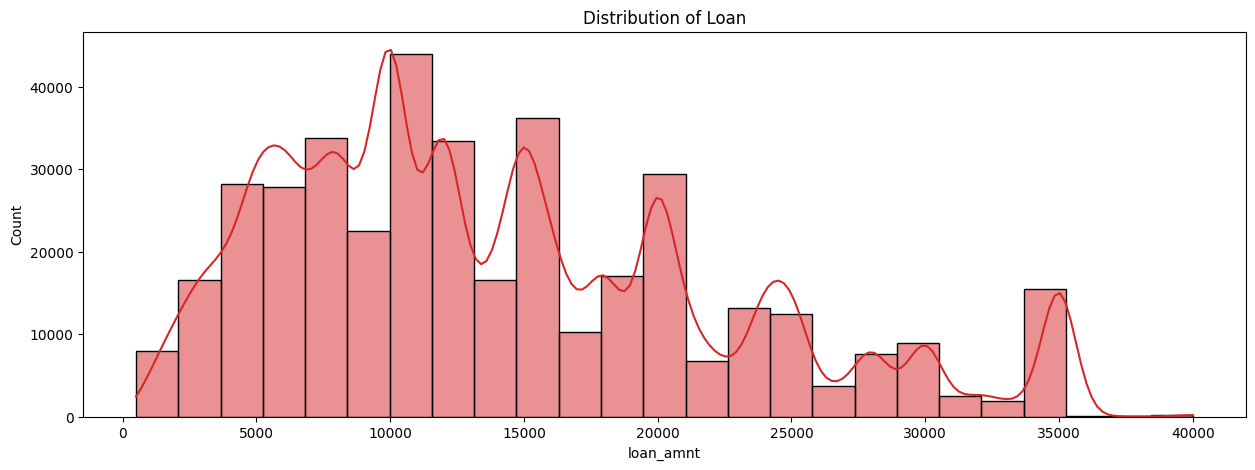

In [38]:
# visualization of loan distribution
plt.figure(figsize=(15,5))
sns.histplot(df['loan_amnt'], bins=25, kde=True, color='C3')
plt.title('Distribution of Loan')
plt.show()

More than 40000 people have taken loan amount of 10000 <br>
And just few people have taken loan amount of more than 35000

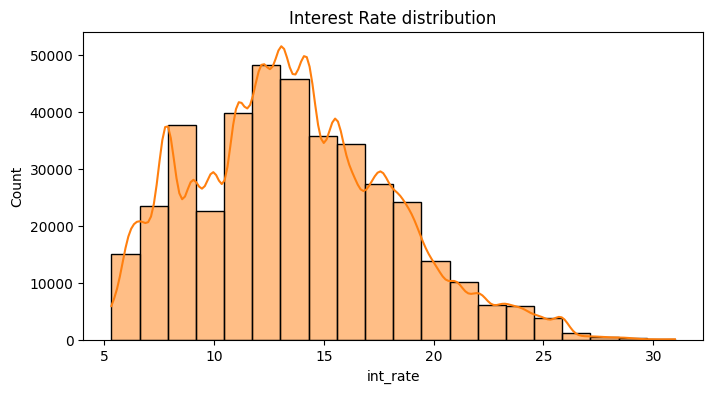

In [39]:
# visualization of interest rate distribution
plt.figure(figsize=(8,4))
sns.histplot(x=df['int_rate'],bins=20, kde=True, color='C1')
plt.title('Interest Rate distribution')
plt.show()

Approximatly 50000 people had interest rate of something around 12-13

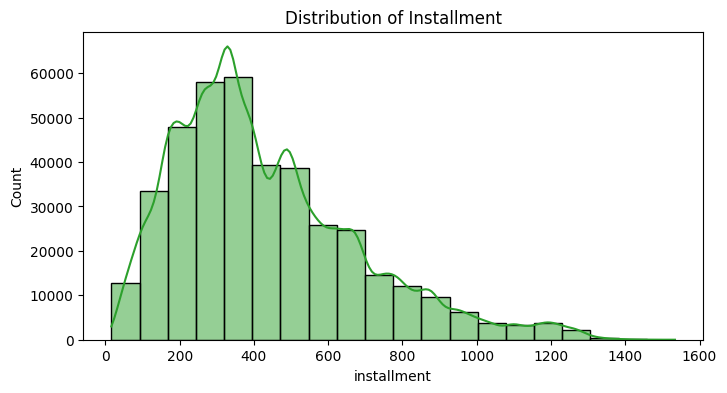

In [40]:
# visualization of installement distributation
plt.figure(figsize=(8,4))
sns.histplot(x=df['installment'],bins=20, kde=True, color='C2', alpha=0.5)
plt.title('Distribution of Installment')
plt.show()

In [41]:
df_num = df_numerical.drop(['loan_amnt', 'int_rate', 'installment'],axis=1)
df_num.columns

Index(['annual_inc', 'dti', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'mort_acc', 'pub_rec_bankruptcies'],
      dtype='object')

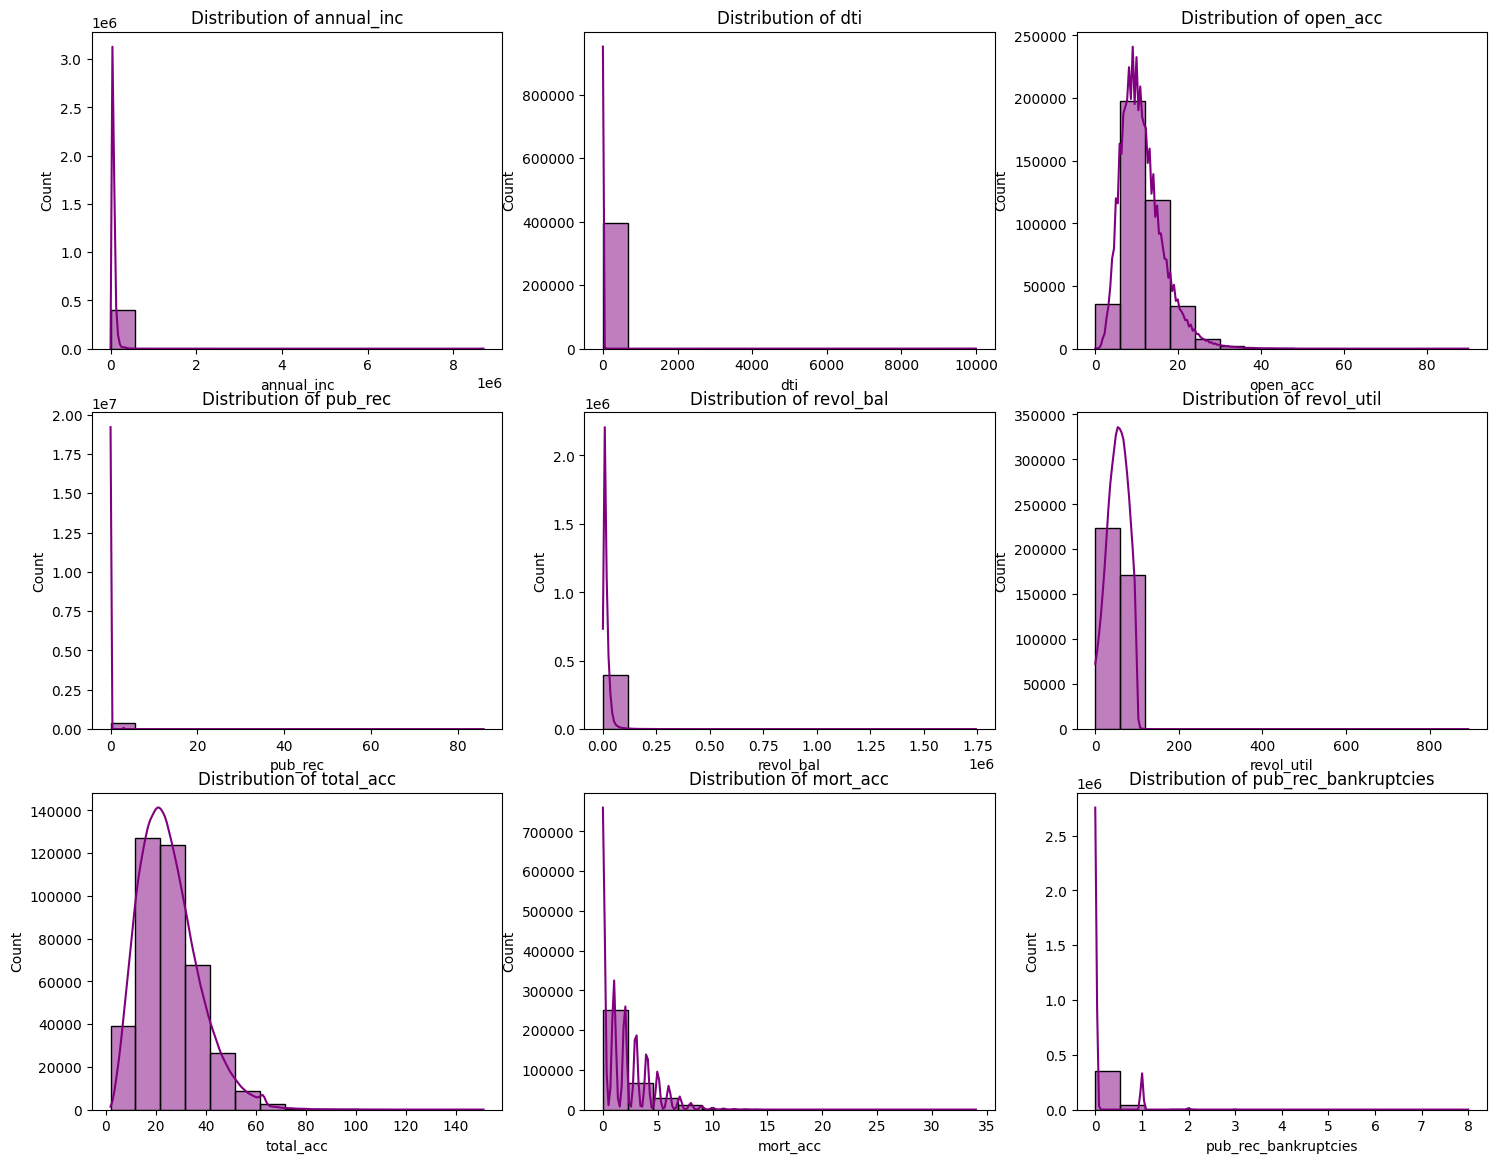

In [42]:
# visualization of numerical distribution
i = 1
plt.figure(figsize=(18,14))
for num_colo in df_num:
    plt.subplot(3,3,i)
    sns.histplot(x = df[num_colo], kde=True, bins=15, color='purple')
    plt.title(f'Distribution of {num_colo}')
    i += 1
plt.show()

---

## 2. Data Preprocessing 

### a. Duplicate value check

In [43]:
# checking for duplicate rows
df.duplicated().sum()

np.int64(0)

There is no even a single row duplicated

### b. Missing value treatment¶

In [44]:
# taking out the columns which have null values
null_col_list = []
for col in df.columns:
    if df[col].count() != len(df):
        null_col_list.append(col)

In [45]:
print(f'List of Null columns :\n{null_col_list}')

List of Null columns :
['emp_title', 'emp_length', 'revol_util', 'mort_acc', 'pub_rec_bankruptcies']


In [46]:
# dataframe of null values column and checking the null values
null_col = df[null_col_list]
null_col.isna().sum()

emp_title               22927
emp_length              18301
revol_util                276
mort_acc                37795
pub_rec_bankruptcies      535
dtype: int64

In [47]:
# separating the float and categorical columns
flt_col = null_col.select_dtypes(include='float')
cat_col = null_col.select_dtypes(include='object')

#### fill missing values

In [48]:
# filling missing numerical values with mean 
for colo in flt_col:
    df[colo] = df[colo].fillna(df[colo].median())

In [49]:
# filling missing categorical values with 'missing value' str
for colu in cat_col:
    df[colu] = df[colu].fillna(df[colu].mode()[0])

#### Now, all the columns are filled

In [50]:
# checking for missing values in dataframe
df.isna().sum()

loan_amnt               0
term                    0
int_rate                0
installment             0
grade                   0
emp_title               0
emp_length              0
home_ownership          0
annual_inc              0
verification_status     0
issue_d                 0
loan_status             0
purpose                 0
dti                     0
earliest_cr_line        0
open_acc                0
pub_rec                 0
revol_bal               0
revol_util              0
total_acc               0
initial_list_status     0
application_type        0
mort_acc                0
pub_rec_bankruptcies    0
address                 0
dtype: int64

### c. Outlier treatment

In [51]:
# treatment of outliers 
for colos in df_numerical:

    # finding q1, q3 and IQR
    q1 = df[colos].quantile(0.25)
    q3 = df[colos].quantile(0.75)
    IQR = q3 - q1

    # finding upper wisker and lower wisker
    upper_wisker = q3 + 1.5 * IQR
    lower_wisker = q1 - 1.5 * IQR

    # capping the outliers
    df[colos] = df[colos].clip(lower=lower_wisker, upper=upper_wisker)

#### Now, all the outliers are treated

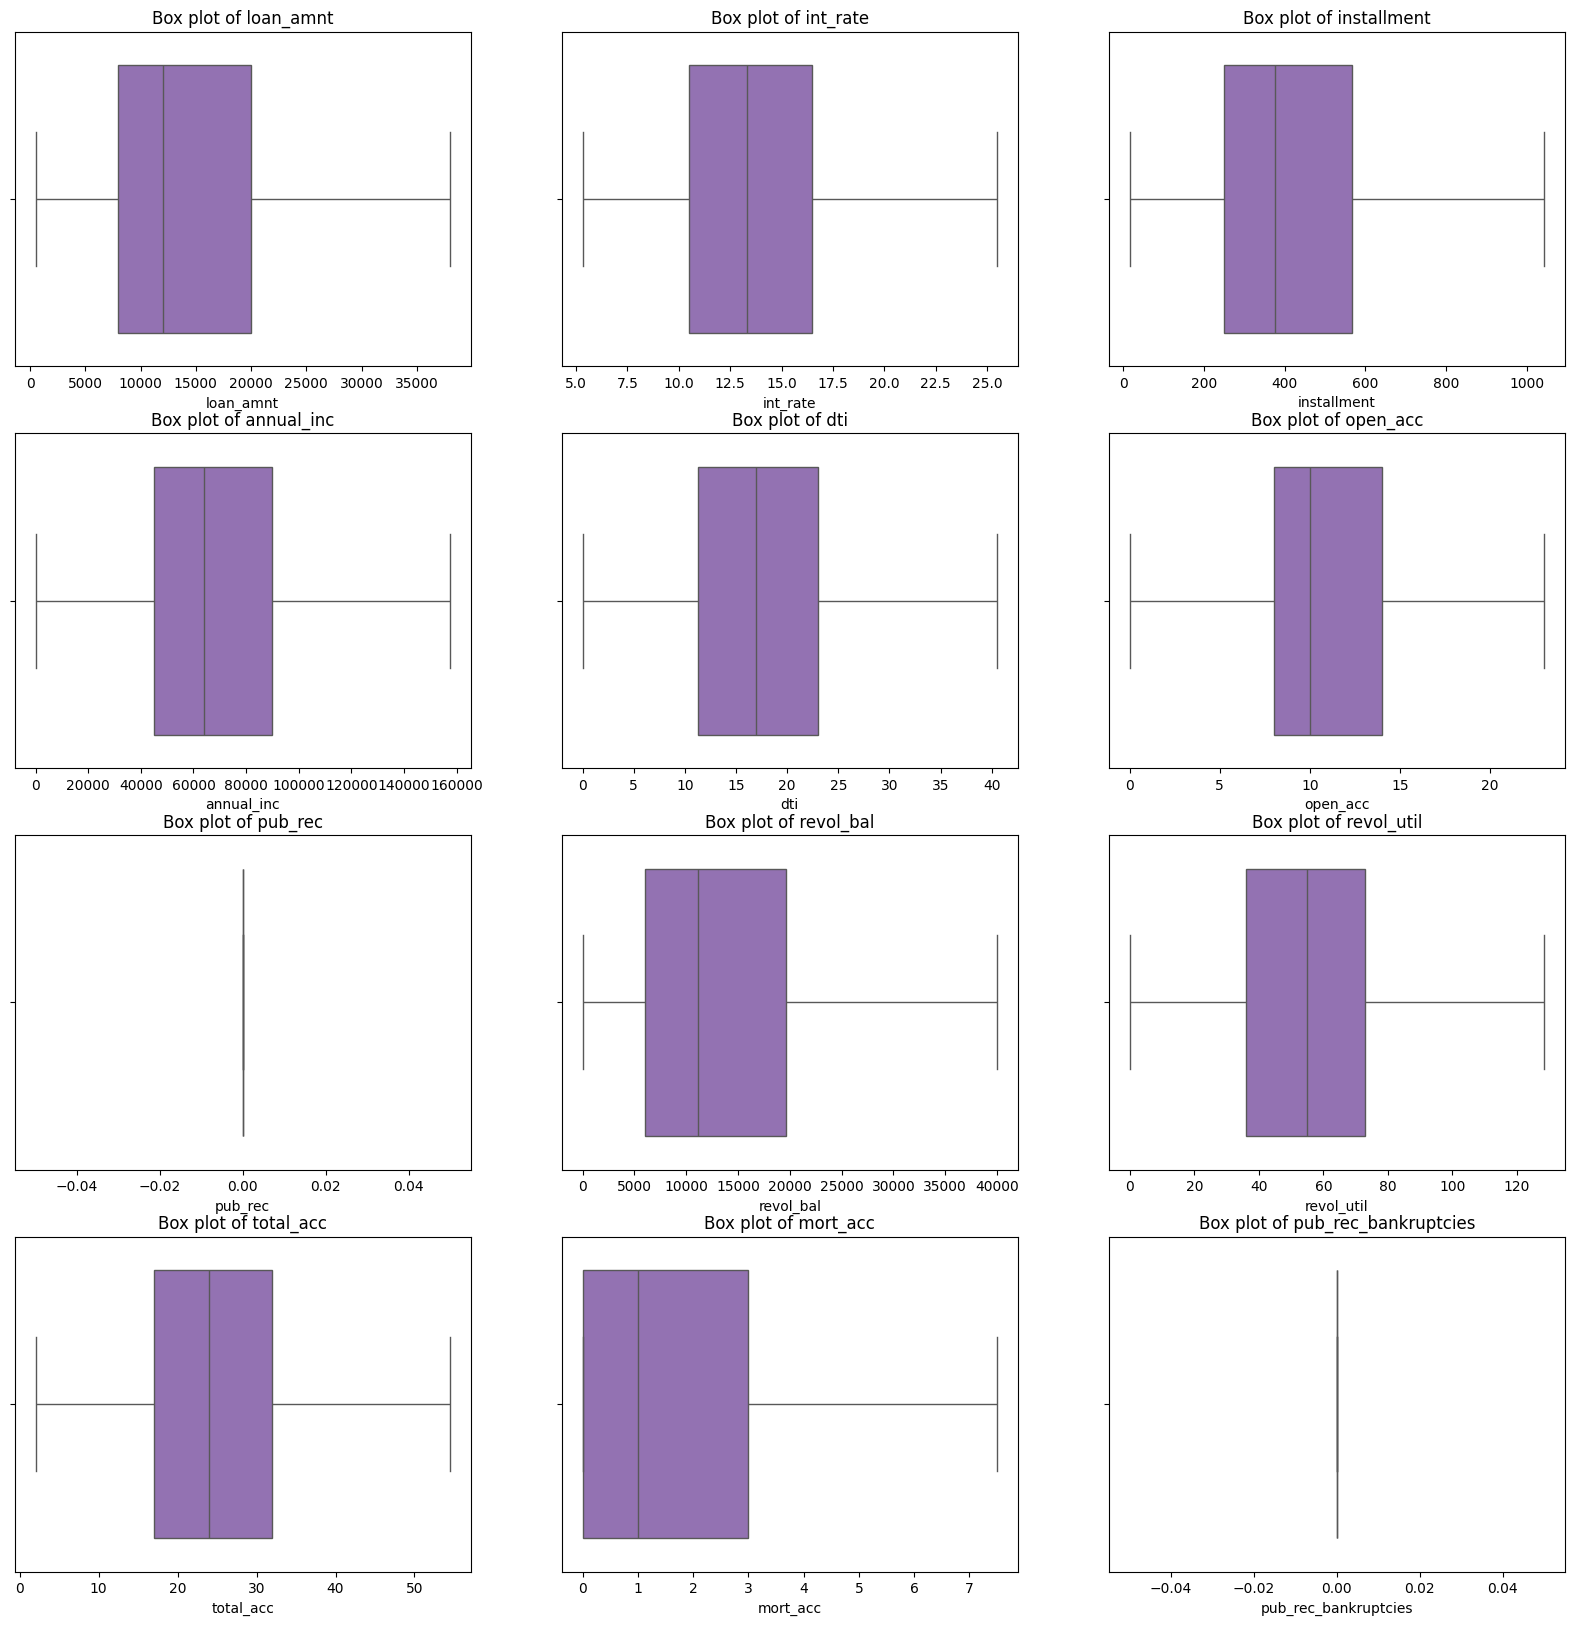

In [52]:
# boxplot of each numerical columns 
i = 1
plt.figure(figsize=(20,20))
for num_col in df_numerical:
    plt.subplot(4,3,i)
    sns.boxplot(x = df[num_col], color='C4')
    plt.title(f'Box plot of {num_col}')
    i += 1
plt.show()

### d. Encoding categorical columns

#### LabelEncoder for Categorical Target column

In [53]:
# importing library for label encoder
from sklearn.preprocessing import LabelEncoder

In [54]:
# label encoder for target column
lb_ecd = LabelEncoder()
df['loan_status'] = lb_ecd.fit_transform(df['loan_status'])

In [55]:
df['loan_status'].head()

0    1
1    1
2    1
3    1
4    0
Name: loan_status, dtype: int64

In [56]:
lb_ecd.classes_

array(['Charged Off', 'Fully Paid'], dtype=object)

#### OrdinalEncoder for Categorical Orderd columns

In [57]:
grade = sorted(df['grade'].unique())
grade

['A', 'B', 'C', 'D', 'E', 'F', 'G']

In [58]:
term = sorted(df['term'].unique())
term

[' 36 months', ' 60 months']

In [59]:
sorted(df['emp_length'].unique())

['1 year',
 '10+ years',
 '2 years',
 '3 years',
 '4 years',
 '5 years',
 '6 years',
 '7 years',
 '8 years',
 '9 years',
 '< 1 year']

In [60]:
# importing library for ordinal encoder
from sklearn.preprocessing import OrdinalEncoder

In [61]:
# ordinal encoder for ordard column
ord_ecd = OrdinalEncoder(categories=[grade, term, ['< 1 year','1 year','2 years','3 years','4 years','5 years','6 years','7 years','8 years','9 years','10+ years']])
df[['grade','term','emp_length']] = ord_ecd.fit_transform(df[['grade','term','emp_length']])

#### OneHotEncoder for categorical columns which have less Unique values

In [1]:
# importing library for one hot encoder
from sklearn.preprocessing import OneHotEncoder

In [63]:
less_uni_cat = ['home_ownership','initial_list_status','verification_status','application_type']

In [64]:
# one hot encoding for some categorical columns
for one in less_uni_cat:
    encoder = OneHotEncoder()
    encoded = encoder.fit_transform(df[[one]])
    df[encoder.categories_[0]] = encoded.toarray().astype(int)

In [65]:
# then droping that column
df.drop(less_uni_cat, axis=1, inplace=True)

In [66]:
# taking out rest of the categorical columns
df_category = df.select_dtypes(include='object')
df_category.head(2)

,emp_title,issue_d,purpose,earliest_cr_line,address
0,Marketing,Jan-2015,vacation,Jun-1990,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,Credit analyst,Jan-2015,debt_consolidation,Jul-2004,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"


#### TargetEncoder for categorical columns which have many unique values

In [67]:
cat_col = df_category.columns
cat_col

Index(['emp_title', 'issue_d', 'purpose', 'earliest_cr_line', 'address'], dtype='object')

In [68]:
# importing library for target encoder
from category_encoders import TargetEncoder

In [69]:
# target encoder for categorical columns
for column in cat_col:
    encoder = TargetEncoder(cols=[column])
    df[column] = encoder.fit_transform(df[column], df['loan_status'])

In [70]:
df.sample(3)

,loan_amnt,term,int_rate,installment,grade,emp_title,emp_length,annual_inc,issue_d,loan_status,...,OWN,RENT,f,w,Not Verified,Source Verified,Verified,DIRECT_PAY,INDIVIDUAL,JOINT
13888,2400.0,0.0,16.99,85.56,3.0,0.699281,1.0,27000.0,0.782169,0,...,0,1,0,1,0,0,1,0,1,0
316458,21000.0,0.0,7.90,657.10,0.0,0.831692,3.0,157500.0,0.843492,1,...,0,0,0,1,0,0,1,0,1,0
345656,12800.0,0.0,14.31,439.41,2.0,0.836545,1.0,127000.0,0.747971,1,...,0,0,0,1,0,0,1,0,1,0


#### Now, all the categorical columns are Encoded

In [71]:
# final summery of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 33 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  float64
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  float64
 5   emp_title             396030 non-null  float64
 6   emp_length            396030 non-null  float64
 7   annual_inc            396030 non-null  float64
 8   issue_d               396030 non-null  float64
 9   loan_status           396030 non-null  int64  
 10  purpose               396030 non-null  float64
 11  dti                   396030 non-null  float64
 12  earliest_cr_line      396030 non-null  float64
 13  open_acc              396030 non-null  float64
 14  pub_rec               396030 non-null  float64
 15  

### Divide dataset into features and target

In [72]:
x = df.drop('loan_status', axis=1)
y = df['loan_status']

### Divide dataset into train test split

In [73]:
from sklearn.model_selection import train_test_split

In [74]:
# split dataset into train, validation and test data
x_train_val, x_test, y_train_val, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
x_train, x_val, y_train, y_val = train_test_split(x_train_val, y_train_val, test_size=0.2, random_state=42)

In [75]:
# checking their shapes
x_train.shape, x_val.shape, x_test.shape

((253459, 32), (63365, 32), (79206, 32))

In [76]:
y_train.shape, y_val.shape, y_test.shape

((253459,), (63365,), (79206,))

### e. Check for imbalance dataset and balancing it

In [77]:
# checking value_counts of eack class 
y_train.value_counts()

loan_status
1    203720
0     49739
Name: count, dtype: int64

Here, clearly observe that our dataset is imbalance because class 1 have more than half of the majority and class 0 is in minority

#### Using SMOTE technique to balance the data

In [78]:
# importing library for balancing the dataset
from imblearn.over_sampling import SMOTE

In [79]:
smt = SMOTE()
x_train, y_train = smt.fit_resample(x_train, y_train)

In [80]:
# checking the balance of the data
y_train.value_counts()

loan_status
1    203720
0    203720
Name: count, dtype: int64

Now, the dataset is balanced

### f. Scaling

#### Using StandardScaler for scaling the values

In [81]:
# importing library for scaling
from sklearn.preprocessing import StandardScaler

In [82]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_val_scaled = scaler.transform(x_val)
x_test_scaled = scaler.transform(x_test)

In [83]:
# check train data scaling
x_train_scaled[:3]

array([[ 0.12883875,  1.63740444, -0.80583565, -0.4084519 , -0.82486735,
         0.70878275, -0.32205267, -0.32310062, -1.4428919 ,  1.35689   ,
         0.23453296, -0.26317473,  1.04507262,  0.        , -0.90326025,
        -1.47006275,  0.26760211, -0.89624333,  0.        ,  0.99950619,
        -0.79925353, -0.01543141, -0.26027997,  1.39381443, -1.01195045,
         1.47904788, -0.53875903,  1.68999093, -0.63126751, -0.02148559,
         0.05136149, -0.02617695],
       [-0.23884033,  1.63740444, -1.92491424, -1.19533261, -1.58814719,
         0.94829285, -0.90366037, -0.58988341,  1.89639353, -0.46463284,
        -0.89690464,  0.61334875,  0.37907014,  0.        , -0.31171183,
        -1.31354748,  2.02764532, -0.33766353,  0.        ,  0.99950619,
        -0.79925353, -0.01543141, -0.26027997,  1.39381443,  0.98819068,
        -0.67611063,  1.85611739, -0.59171915, -0.63126751, -0.02148559,
         0.05136149, -0.02617695],
       [-0.53535571, -0.67928318, -0.49007904, -0.4306

In [84]:
# check validation data scaling
x_val_scaled[:3]

array([[ 1.03321066, -0.67928318,  0.72186914,  1.66903224,  0.70169232,
         0.54064037,  1.13196658,  0.03260977, -1.36434593, -0.46463284,
        -0.56908112, -0.64696407, -0.28693234,  0.        , -0.83097347,
        -1.34398101, -1.39980725, -0.89624333,  0.        , -1.00384672,
         1.25116744, -0.01543141, -0.26027997, -0.71745562,  0.98819068,
        -0.67611063, -0.53875903, -0.59171915,  1.58411448, -0.02148559,
         0.05136149, -0.02617695],
       [-0.39302833, -0.67928318, -1.2283923 , -0.33323937, -0.82486735,
         1.07243962,  1.13196658, -0.45382418, -0.58279972, -0.46463284,
        -0.48106624,  0.21491934, -0.06493152,  0.        , -0.30484976,
        -0.65270523,  0.17496825,  0.22091627,  0.        ,  0.99950619,
         1.25116744, -0.01543141, -0.26027997, -0.71745562, -1.01195045,
         1.47904788,  1.85611739, -0.59171915, -0.63126751, -0.02148559,
         0.05136149, -0.02617695],
       [-0.95047724, -0.67928318, -0.10931371, -0.8988

In [85]:
# check test data scaling
x_test_scaled[:3]

array([[-0.0609311 ,  1.63740444,  0.00677328, -0.44945405, -0.06158751,
        -1.35129451,  1.13196658,  0.3290351 , -1.07792097, -0.46463284,
        -0.14176252,  0.02939004, -0.28693234,  0.        , -0.18217843,
         0.36464403, -0.84400413,  0.22091627,  0.        , -1.00384672,
         1.25116744, -0.01543141, -0.26027997, -0.71745562, -1.01195045,
         1.47904788, -0.53875903,  1.68999093, -0.63126751, -0.02148559,
         0.05136149, -0.02617695],
       [-1.00385001, -0.67928318,  0.42468645, -0.93477192,  0.70169232,
        -0.59641816, -1.19446422, -1.43765984, -1.07792097, -0.46463284,
         1.26647549, -1.1064016 , -0.06493152,  0.        , -1.08891227,
        -1.82656976, -0.10293331, -0.89624333,  0.        ,  0.99950619,
        -0.79925353, -0.01543141,  3.84201671, -0.71745562,  0.98819068,
        -0.67611063, -0.53875903, -0.59171915,  1.58411448, -0.02148559,
         0.05136149, -0.02617695],
       [ 0.74262559, -0.67928318,  0.87742571,  1.3291

---

## 3. Model building 

### a. Build the Logistic Regression model

In [86]:
# importing library for training the model
from sklearn.linear_model import LogisticRegression

In [87]:
# training the logistic regression model
log_reg = LogisticRegression()
log_reg.fit(x_train_scaled, y_train)

LogisticRegression()

#### Accuracy of Train, Validation and Test data

In [88]:
# checking scores of each data
print(f'Train data Accuracy : {log_reg.score(x_train_scaled, y_train)*100}')
print(f'Validation data Accuracy : {log_reg.score(x_val_scaled, y_val)*100}')
print(f'Test data Accuracy : {log_reg.score(x_test_scaled, y_test)*100}')

Train data Accuracy : 99.9538582367956
Validation data Accuracy : 99.94476445987533
Test data Accuracy : 99.93561093856526


### b. Display model coefficients with column names

In [89]:
# taking out coefficieant of the model
coeff = log_reg.coef_
coeff = coeff[0]

In [90]:
# displaying the coefficients with their column names
print('Coefficient of each attribute :\n')
print('-'*50)
for i,j in zip(df.columns, coeff):
    print(f'{i}  ->  {j}')

Coefficient of each attribute :

--------------------------------------------------
loan_amnt  ->  -0.07911900314284037
term  ->  -0.2704404413080394
int_rate  ->  -0.22548054571863427
installment  ->  -0.055662476909725984
grade  ->  -0.1936978518679883
emp_title  ->  1.1045237785422632
emp_length  ->  0.060371826725343504
annual_inc  ->  0.1154138795560262
issue_d  ->  0.22903440657027285
loan_status  ->  0.04681379204372021
purpose  ->  -0.004285898636420014
dti  ->  -0.0038054241532238207
earliest_cr_line  ->  -0.0788786893334076
open_acc  ->  0.0
pub_rec  ->  -0.0005818465559190729
revol_bal  ->  -0.15293477512303655
revol_util  ->  0.020713844290620016
total_acc  ->  0.013522669842717286
mort_acc  ->  0.0
pub_rec_bankruptcies  ->  8.19021729444973
address  ->  0.7647365928509954
MORTGAGE  ->  0.007508121798325938
OTHER  ->  0.4074440797845579
OWN  ->  0.7713007333265386
RENT  ->  0.8361393513900771
f  ->  0.710235760409062
w  ->  0.7051129799895054
Not Verified  ->  0.68964893388

---

## 4. Results Evaluation 

In [91]:
test_pred = log_reg.predict(x_test_scaled)

### a. Confusion Matrix 

In [92]:
# importing library for confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [93]:
conf_mat = confusion_matrix(y_test, test_pred )
conf_mat

array([[15552,    25],
       [   26, 63603]])

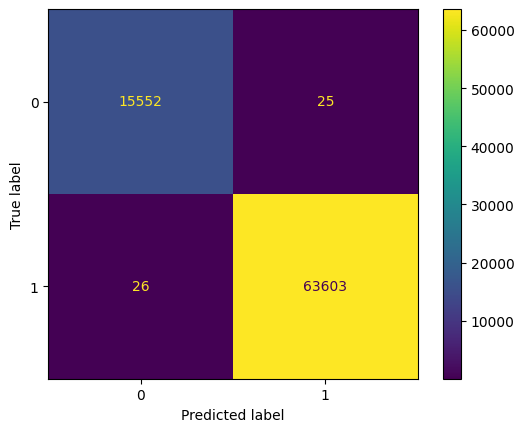

In [94]:
# visualizing the confusion matrix
ConfusionMatrixDisplay(conf_mat).plot()
plt.show()

### b. Classification Report

In [95]:
# importing library for classification report
from sklearn.metrics import classification_report

In [96]:
# checking the classification report of the data
cls_rep = classification_report(y_test, test_pred)
print(f'Classification Report :\n{cls_rep}')

Classification Report :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     15577
           1       1.00      1.00      1.00     63629

    accuracy                           1.00     79206
   macro avg       1.00      1.00      1.00     79206
weighted avg       1.00      1.00      1.00     79206



### c. AU-ROC Curve

In [97]:
# importing library for curve
from sklearn.metrics import roc_curve, roc_auc_score, auc

In [98]:
prob = log_reg.predict_proba(x_test_scaled)
prob = prob[:,1]
prob

array([2.66105693e-05, 9.99520109e-01, 9.99890979e-01, ...,
       9.99653837e-01, 9.99920310e-01, 6.17684047e-04])

In [99]:
fpr, tpr, thr = roc_curve(y_test, prob)

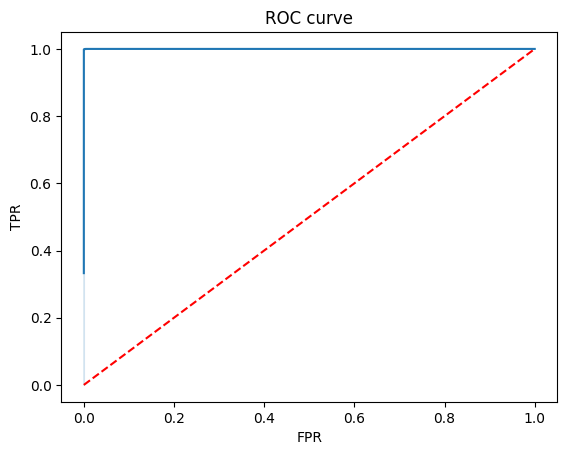

In [100]:
# visualizting the roc curve
sns.lineplot(x=fpr, y=tpr)
plt.plot(fpr,fpr, color='red', linestyle='dashed')
plt.title('ROC curve')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()

### d. Precision Recall Curve

In [101]:
from sklearn.metrics import precision_recall_curve

In [102]:
pre, rec, thr = precision_recall_curve(y_test, prob)

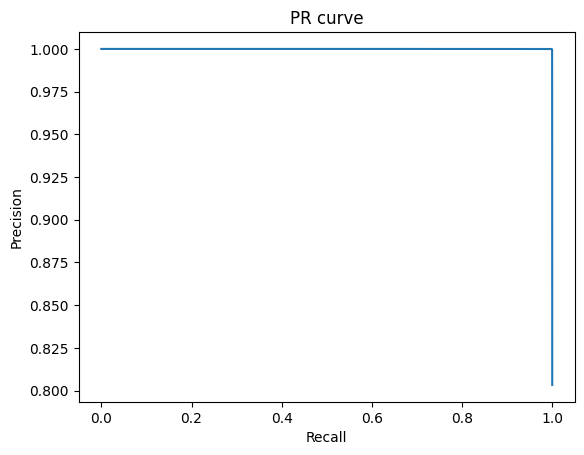

In [103]:
# visualizing the pr curve
plt.plot(rec, pre)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('PR curve')
plt.show()

---